In [1]:
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
import math

In [2]:
# ## Generrate signals
time_step = [x for x in range(0, 96)]
a1 = [math.sin(0.5 * x) for x in time_step]
a2 = [math.cos(0.3 * x) for x in time_step]

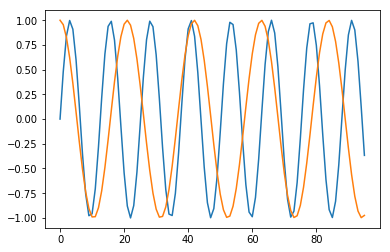

In [3]:
plt.plot(time_step, a1)
plt.plot(time_step, a2)
# plt.show()
plt.savefig('figure_combination2.png')
plt.show()


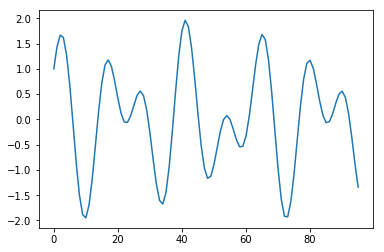

(2, 96)
(2, 96)


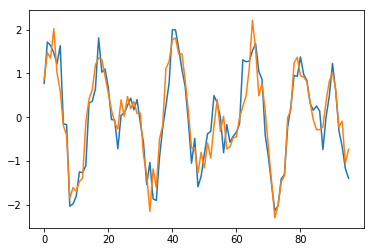

In [4]:
mix = []
for i in range(len(a1)):
    mix.append(a1[i] + a2[i])
plt.plot(time_step, mix)
plt.savefig('mix_up')
plt.show()
real_mix = np.array([mix, mix])
print(real_mix.shape)
noise = 0.3 * np.random.randn(2, 96)
catch = np.array([i + j for i, j in zip(real_mix, noise)])
print(catch.shape)
plt.plot(time_step, catch[0,:])
plt.plot(time_step, catch[1,:])
plt.savefig('add_noise')
plt.show()

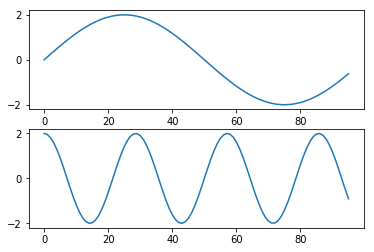

In [5]:
C = 96 # the number of samples
x = np.arange(C)
s1 = 2 * np.sin(0.02 * np.pi * x) # sin signal

a = np.linspace(-2, 2, 25)
# s2 = np.array([a, a, a, a, a, a, a, a]).reshape(200,) # saw signal
s2 = 2 * np.cos(0.07 * np.pi * x)
# s3 = np.array(20 * (5 * [2] + 5 * [-2]))
# s4 = 4 * (np.random.random([1, C]) - 0.5).reshape(200, ) # random singla 

# drow origin signal 
ax1 = plt.subplot(211)
ax2 = plt.subplot(212)
# ax3 = plt.subplot(413)
# ax4 = plt.subplot(414)

ax1.plot(x,s1)
ax2.plot(x,s2)
# ax3.plot(x,s3)
# ax4.plot(x,s4)
plt.show()

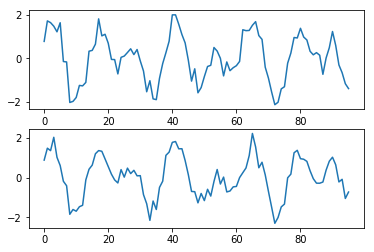

In [7]:
# s=np.array([s1,s2])  #合成信号
# ran = np.array([[0.6, 0.4], [0.601, 0.399]])
# mix=ran.dot(s) #混合信号
mix = catch
# drow mix signal 
ax1 = plt.subplot(211)
ax2 = plt.subplot(212)
# ax3 = plt.subplot(413)
# ax4 = plt.subplot(414)
ax1.plot(x,mix.T[:,0])
ax2.plot(x,mix.T[:,1])
# ax3.plot(x,mix.T[:,2])

# ax4.plot(x,mix.T[:,3])
plt.savefig('Mimic a day signal caught in two days')
plt.show()

In [8]:
Maxcount=100000  #  %最大迭代次数  
Critical=0.00001  #  %判断是否收敛
R,C=mix.shape

In [9]:
average=np.mean(mix, axis=1) #计算行均值，axis=0，计算每一列的均值
 
for i in range(R):
    mix[i,:]=mix[i,:]- average[i] #数据标准化，均值为零
Cx=np.cov(mix)  
value,eigvector = np.linalg.eig(Cx)#计算协方差阵的特征值
val=value**(-1/2)*np.eye(R, dtype=float) 
White=np.dot(val ,eigvector.T)  #白化矩阵
 
Z=np.dot(White,mix) #混合矩阵的主成分Z，Z为正交阵
 
 
#W = np.random.random((R,R))# 4x4
W=0.5*np.ones([2, 2])#初始化权重矩阵
 
for n in range(R):
    count=0    
    WP=W[:,n].reshape(R,1) #初始化
    LastWP=np.zeros(R).reshape(R,1) # 列向量;LastWP=zeros(m,1); 
    while np.linalg.norm(WP-LastWP,1)>Critical:
        #print(count," loop :",LA.norm(WP-LastWP,1))
        count=count+1
        LastWP=np.copy(WP)    #  %上次迭代的值  
        gx=np.tanh(LastWP.T.dot(Z))  # 行向量
 
        for i in range(R):  
            tm1=np.mean( Z[i,:]*gx ) 
            tm2=np.mean(1-gx**2)*LastWP[i] #收敛快
            #tm2=np.mean(gx)*LastWP[i]     #收敛慢
            WP[i]=tm1 - tm2
        #print(" wp :", WP.T ) 
        WPP=np.zeros(R) #一维0向量
        for j in range(n):  
            WPP=WPP+  WP.T.dot(W[:,j])* W[:,j] 
        WP.shape=1,R
        WP=WP-WPP
        WP.shape=R,1
        WP=WP/(np.linalg.norm(WP))
        if(count ==Maxcount):
            print("reach Maxcount，exit loop",np.linalg.norm(WP-LastWP,1))
            break
    print("loop count:",count )
    W[:,n]=WP.reshape(R,)
SZ=W.T.dot(Z)

reach Maxcount，exit loop 2.2669028276854686
loop count: 100000
loop count: 2


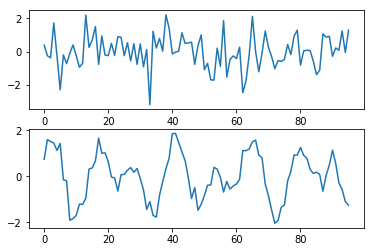

In [10]:
# plot extract signal
x=np.arange(0,C)
ax1 = plt.subplot(211)
ax2 = plt.subplot(212)
# ax3 = plt.subplot(413)
# ax4 = plt.subplot(414)
ax1.plot(x, SZ.T[:,0])
ax2.plot(x, SZ.T[:,1])
# ax3.plot(x, SZ.T[:,2])
# ax4.plot(x, SZ.T[:,3])
plt.savefig("Recovered data using FastICA")
plt.show()

In [103]:
ran

array([[0.6  , 0.4  ],
       [0.601, 0.399]])

In [76]:
np.mean(ran)

0.5